Evaluation: Root Mean Squared Logarithmic Error 
분류와 회귀중 회귀와 관련 된 문제 => 대여량(수량 데이터) 예측

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 내에 그래프 그리기
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

In [6]:
# 데이트타임 형태로 변환된 채 불러오기
train = pd.read_csv('train.csv',parse_dates=['datetime'])
train.shape

(10886, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [11]:
train.head(10)
#wind speed가 0인 데이터들을 어떻게 feature engineering 해줄지에 따라 점수가 다를 것으로 예측

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [9]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [12]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

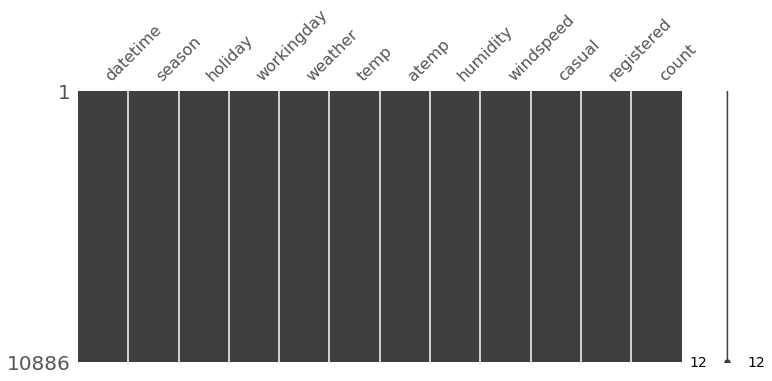

In [15]:
# 결측값 시각화
import missingno as msno
msno.matrix(train, figsize=(12,5))

<AxesSubplot:>

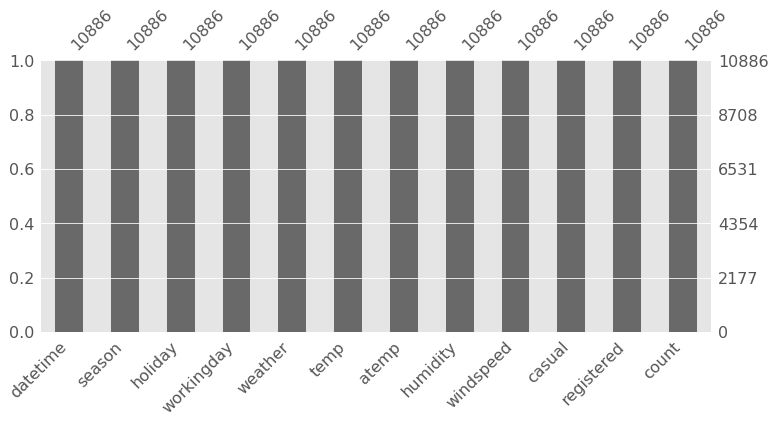

In [16]:
msno.bar(train, figsize=(12,5))

In [18]:
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

(10886, 18)

In [21]:
train.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
5336,2011-12-16 10:00:00,4,0,1,1,13.94,15.150,46,19.9995,10,122,132,2011,12,16,10,0,0
4706,2011-11-09 04:00:00,4,0,1,1,13.12,17.425,87,0.0000,0,4,4,2011,11,9,4,0,0
1347,2011-04-02 00:00:00,2,0,0,2,12.30,16.665,61,0.0000,3,29,32,2011,4,2,0,0,0
6236,2012-02-16 02:00:00,1,0,1,2,12.30,15.910,70,6.0032,1,6,7,2012,2,16,2,0,0
8389,2012-07-10 22:00:00,3,0,1,2,26.24,28.790,83,8.9981,14,125,139,2012,7,10,22,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from c

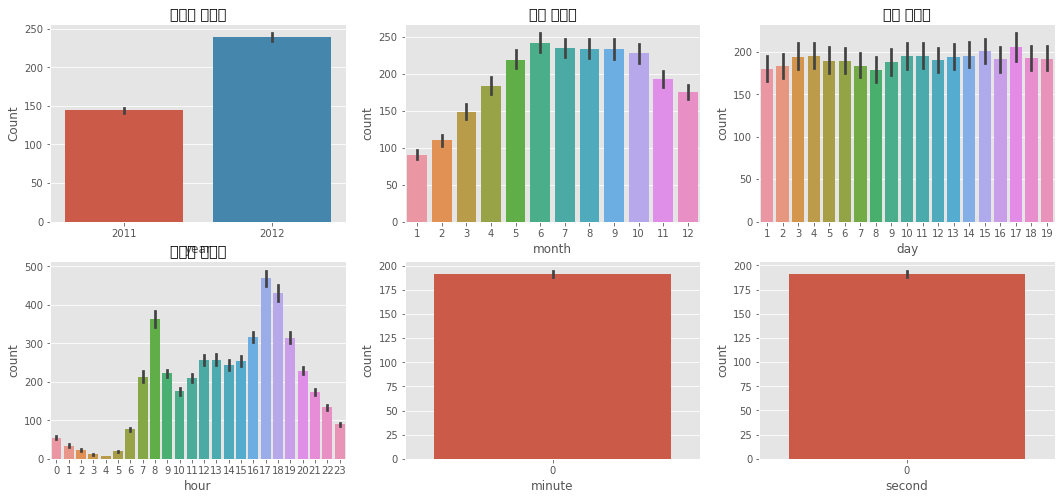

In [26]:
# 2행 3열
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)

figure.set_size_inches(18,8)

# barplot 
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(xlabel='month', title='월별 대여량')
ax3.set(xlabel='day', title='일별 대여량')
ax4.set(xlabel='hour', title='시간별 대여량')

* 연도별: 2012년에 더 증가함
* 월별: 따듯한 계절에 많음.
* 일별: => 19일까지만 있음(train),19일 이후(test), feature로 사용할 수 없음
* 시간별: 출근시간, 퇴근시간에 많음.
* 분,초 : 사용 불가능

<AxesSubplot:xlabel='workingday', ylabel='count'>

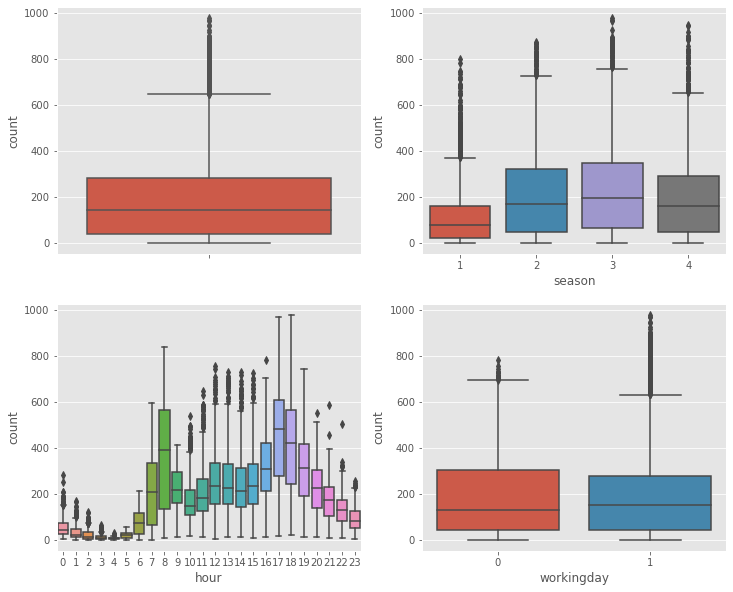

In [27]:
fig, axes= plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count',orient='v',ax=axes[0][0])
sns.boxplot(data=train, y='count',x='season',orient='v',ax=axes[0][1])
sns.boxplot(data=train, y='count',x='hour',orient='v',ax=axes[1][0])
sns.boxplot(data=train, y='count',x='workingday',orient='v',ax=axes[1][1])



* 대여량: 일정기간에 몰려있음
* 계절별: 봄여름에 몰림
* 시간별: 위와 같음
* 근무일 여부: 큰 차이는 없음, 휴일에 더 많음.

In [28]:
train['dayofweek']=train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [29]:
train['dayofweek'].value_counts()
# 월화수목금토일 => 토, 일에 조금 많음

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

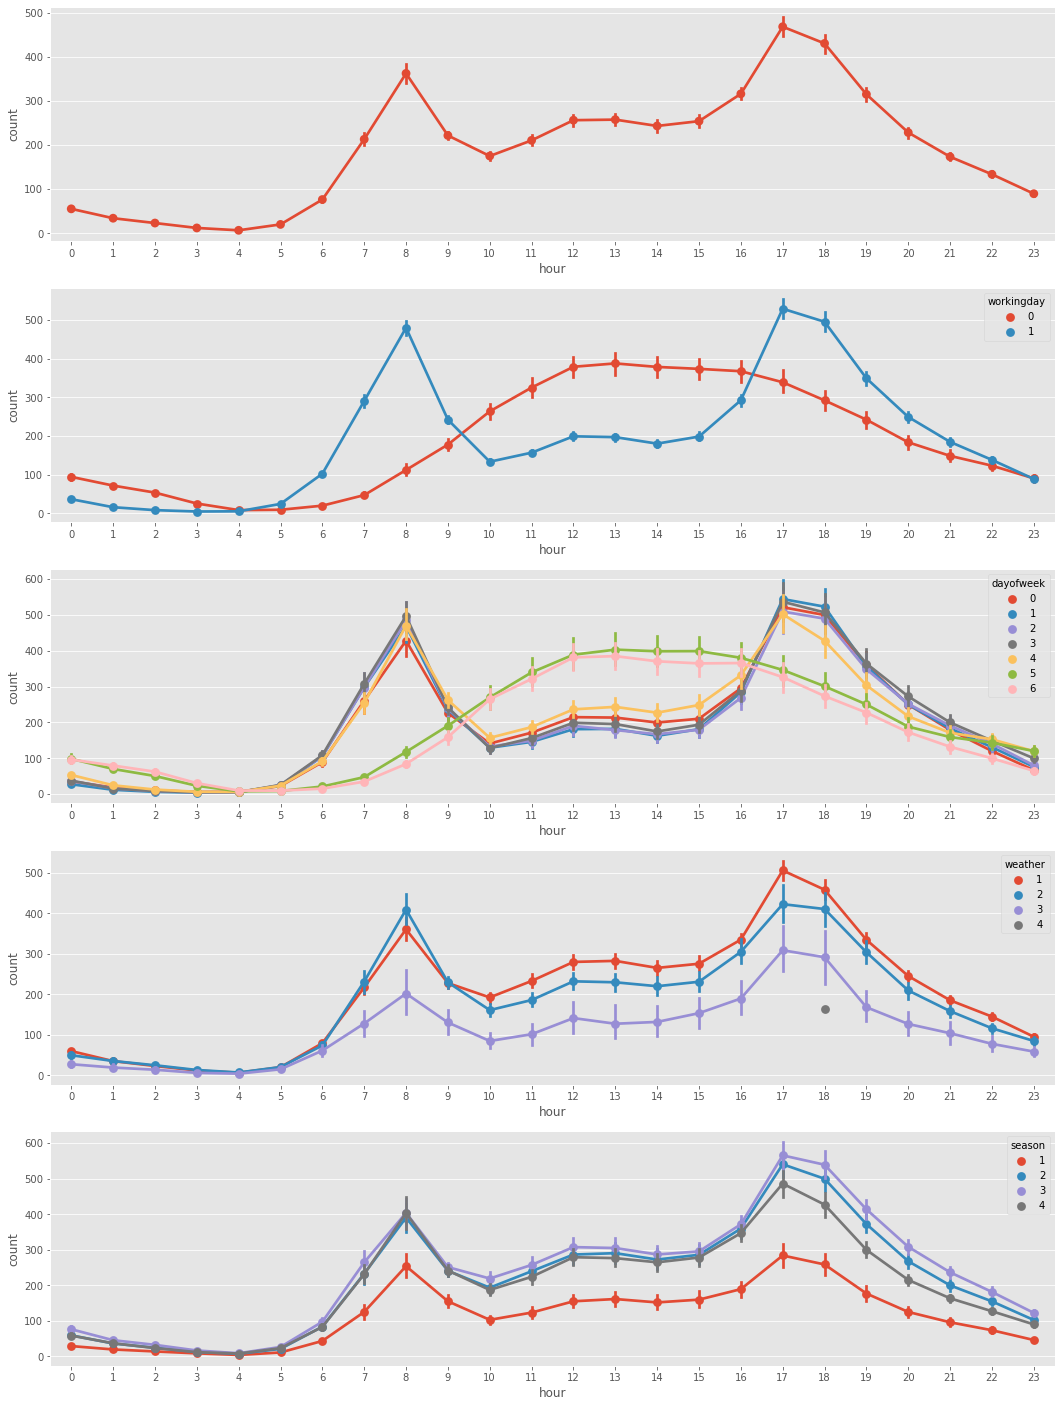

In [35]:
fig, (ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x='hour',y='count',ax=ax1)
sns.pointplot(data=train, x='hour',y='count',hue='workingday',ax=ax2)
sns.pointplot(data=train, x='hour',y='count',hue='dayofweek',ax=ax3)
sns.pointplot(data=train, x='hour',y='count',hue='weather',ax=ax4)
sns.pointplot(data=train, x='hour',y='count',hue='season',ax=ax5)

* working day로 보면 휴일에는 낮 시간에 더 많음
* dayofweek도 휴일에는 working day랑 비슷한 패턴
* weather: 날씨가 좋을 때 > 흐릴 때 > 눈,비
* season: 가을 > 여름 > 겨울 > 봄

In [40]:
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask= np.array(corrMatt)
mask[np.tril_indices_from(mask)] =False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

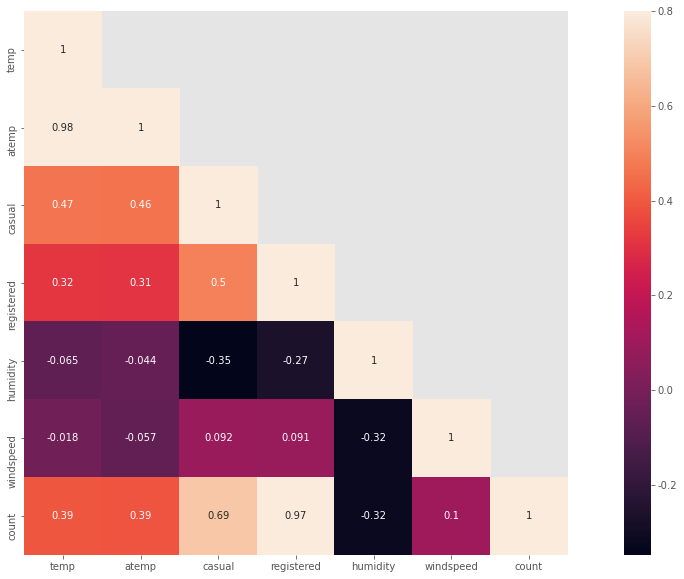

In [42]:
fig, ax =plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True,annot=True)

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은건 registered, test 데이터에는 이 값이 없다.
* atemp와 temp는 0.98로 상관관계가 높음. 둘 다 함께 피처로 사용하는 것은 부적합

<AxesSubplot:xlabel='humidity', ylabel='count'>

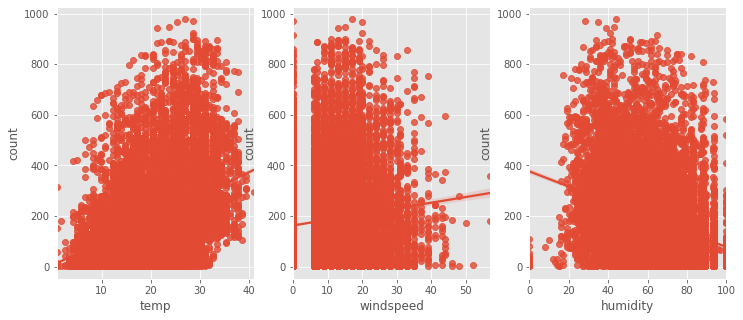

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp', y='count',data=train,ax=ax1)
sns.regplot(x='windspeed', y='count',data=train,ax=ax2)
sns.regplot(x='humidity', y='count',data=train,ax=ax3)

* 풍소은 0에 데이터가 몰려있음 -> feature engineering에서 조정이 필요해보임.

In [46]:
def concatenate_year_month(datetime):
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

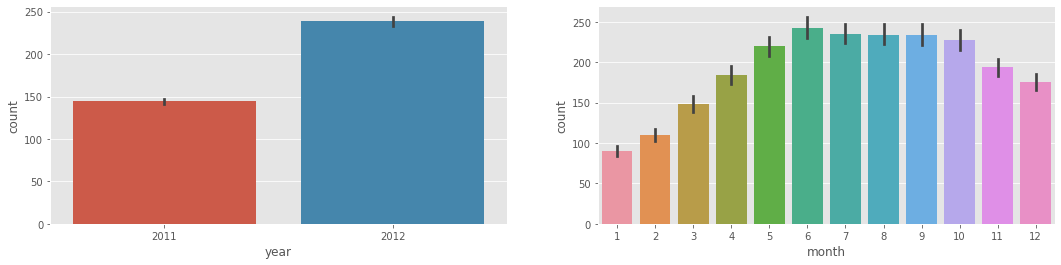

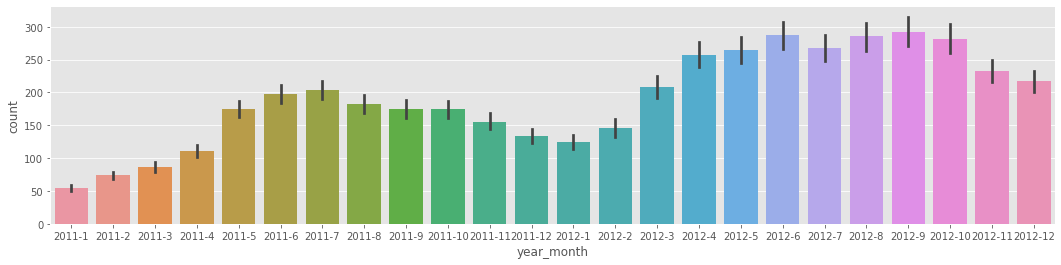

In [47]:
fig, (ax1,ax2)=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year',y='count',ax=ax1)
sns.barplot(data=train, x='month',y='count',ax=ax2)

fig, ax3=plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month',y='count',ax=ax3)

* 2011년보다 2012년에 훨씬 증가
* 따듯한 계절에 많음
* 연도별로 증가하는 추세임

In [49]:
# outlier 제거하기 평균  +- 표준편차의 3배
trainWithoutOutliers = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([ 1.        ,  1.        ,  1.        , ..., 27.05549852,
         27.07397274, 27.09243437])),
 (6.3841178877202225, 11.880366080979938, 0.9863972257133206))

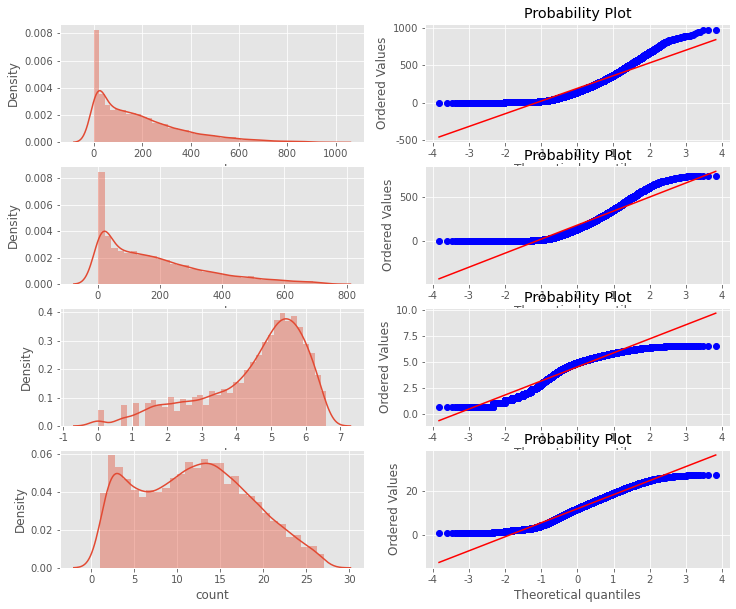

In [64]:
figure, axes= plt.subplots(ncols=2,nrows=4)
figure.set_size_inches(12,10)

sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'],dist='norm',fit=True,plot=axes[0][1])
sns.distplot(trainWithoutOutliers['count'], ax=axes[1][0])
stats.probplot(trainWithoutOutliers['count'],dist='norm',fit=True,plot=axes[1][1])
sns.distplot(np.log(trainWithoutOutliers['count']), ax=axes[2][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']),dist='norm',fit=True,plot=axes[2][1])
sns.distplot(np.sqrt(trainWithoutOutliers['count']), ax=axes[3][0])
stats.probplot(np.sqrt(trainWithoutOutliers['count']),dist='norm',fit=True,plot=axes[3][1])

* 머신러닝에서는 종속변수가 정규분포를 따라야 정확도가 높음 log나 sqrt 변환으로 어느정도 정규분포화 시켜주기

* scikit-learn 라이브러리
   * 1.분류(타이타닉)
   * 2.회귀(자전거 대여량 예측)-> (선형,랜덤포레스트)
   * 3.군집화
   * 4.차원축소

* 지도학습과 비지도학습의 차이 => train 데이터에 이미 label이 있는지 없는지

* clf =RandomForestClassifier()
* clf.fit(X_train, y_train)

* y_pred=clf.predict(X_test)
* clf.score(X_test, y_test)

* decision tree
    * 속도가 빠르고 시각화하여 보기 좋음
* 랜덤포레스트 => 여러개의 decision tree에서 투표를 해서 결과를 산출

* evaluation
    * overfitting: 일반화가 어려움(outlier or 너무 많은 feature)
    * underfitting: 너무 간단한 모델
    * RMSLE
        * 과대평가보다는 과소평가에 패널티를 줌,
        * 오차를 제곱해서 평균한 값의 제곱근
        * 값이 작을수록 정확도가 높음
        * 

* def rmsle(predicted_values, actual_vales):
    * 1. 넘파이로 배열 형태 바꿔주기
    * 2. 예측값과 실제 값에 1 더하고 로그 씌워주기
    * 3. 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해줌.
    * difference = (log_predict - log_actual) ** 2
    * 4. 평균을 냄
    * 5. 다시 루트를 씌움
    

* KFold 교차검증 => 데이터를 fold라 부르는 비슷한 크기의 부분집합으로 나눔
* fold 의 개수만큼 훈련을 반복함 각 훈련마다 n번째 fold가 test셋이 됨